target_names: ['setosa' 'versicolor' 'virginica']
labels: ['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolo

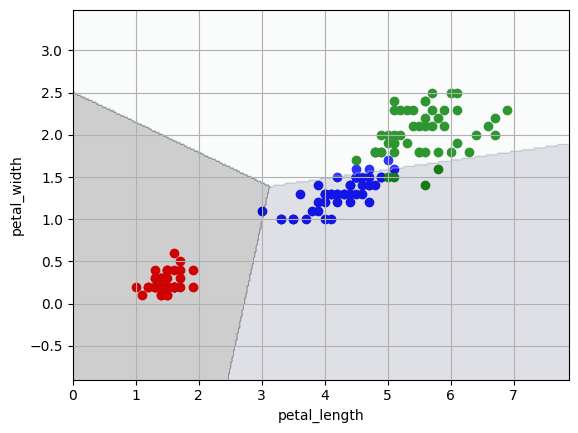

In [3]:
from sklearn import svm
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split

iris=datasets.load_iris()
feature=iris.data       #0花萼長度,1花萼寬度,2花瓣長度,3花瓣寬度
target=iris.target

target_names=iris.target_names
labels=target_names[target]  #查看資料中有幾種不同類型的花
print('target_names:',target_names)
print('labels:',labels)

#因作圖為二元圖型，因此只取兩個變數
setosa_petal_length=feature[labels=='setosa',2]   #2花瓣長度
setosa_petal_width=feature[labels=='setosa',3]    #3花瓣寬度
setosa=np.c_[setosa_petal_length,setosa_petal_width]  #np.c_:column combine欄組合(向右排)
versicolor_petal_length=feature[labels=='versicolor',2]
versicolor_petal_width=feature[labels=='versicolor',3]
versicolor=np.c_[versicolor_petal_length,versicolor_petal_width]
virginica_petal_length=feature[labels=='virginica',2]
virginica_petal_width=feature[labels=='virginica',3]
virginica=np.c_[virginica_petal_length,virginica_petal_width]


plt.scatter(setosa[:,0],setosa[:,1],color='red')    #0第一個特徵,1第二個特徵
plt.scatter(versicolor[:,0],versicolor[:,1],color='blue')
plt.scatter(virginica[:,0],virginica[:,1],color='green')
plt.xlabel('petal_length')
plt.ylabel('petal_width')

#在這個案例將所有樣本放在teat data，traing data為圖中所有空白的部分
training_data=np.r_[setosa,versicolor,virginica]    #np.r_:row combine列組合(向下排)
training_labels=np.r_[np.zeros(len(setosa)),np.ones(len(versicolor)),np.ones(len(virginica))*2] #將文字轉換成數字0,1,2
print('轉換training_labels:',training_labels)

clf=svm.LinearSVC()
clf.fit(training_data,training_labels)

#為了讓白色沒有樣本點的地方也被預測到，所以會先找X、Y軸的最大最小值使其+1、-1
training_x_min=training_data[:,0].min()-1
training_x_max=training_data[:,0].max()+1
training_y_min=training_data[:,1].min()-1
training_y_max=training_data[:,1].max()+1
grid_interval=0.02   #白色地方可以被無限切割，設0.02表示以0.02做為網格切割線
xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))
z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)
plt.contourf(xx,yy,z,cmap=plt.cm.bone,alpha=0.2)
plt.autoscale()
plt.grid()
plt.show()

#np.meshgrid(np.arange)是一個生成一維等差數列並轉換為矩陣形式的過程。
#np.arange函數用於生成一個一維的等差數列，然後np.meshgrid函數將這個一維數列轉換成矩陣形式，便於進行網格運算。
#ravel()是NumPy中的一個函數，用於將多維數組展平為一維。
#具體而言，ravel()函數會返回一個陣列的視圖，該視圖展平了原始陣列。如果修改了展平陣列中的值，原始陣列中相應的值也會被修改。
#contourf是Matplotlib庫中的一個函式，用於繪制2D等高線圖。
#等高線圖是用來顯示三維表面資料的常用工具，透過將三維表面資料投影到二維平面上，使用等高線來表示表面高度。
#alpha是Matplotlib中用於設置繪圖物件的透明度。值範圍在0到1之間,0表示完全透明，1表示完全不透明，0.5則表示半透明

## 重要參數

C：懲罰係數，C愈大代表容忍錯誤的程度愈低，愈容易造成過度擬合的問題(預設為1)

gamma：決定支援向量的多寡，影響訓練速度與預測速度('scale','auto')

kernel：決定不同的核函數，如：linear,poly,rbf,sigmoid等

degree:表示多項式核函數的次數為，多項式核函數的次數越高，可以擬合的曲線越複雜，但模型的計算成本也越高，容易發生過擬合現象。(多项式函数的维度，默认是3)

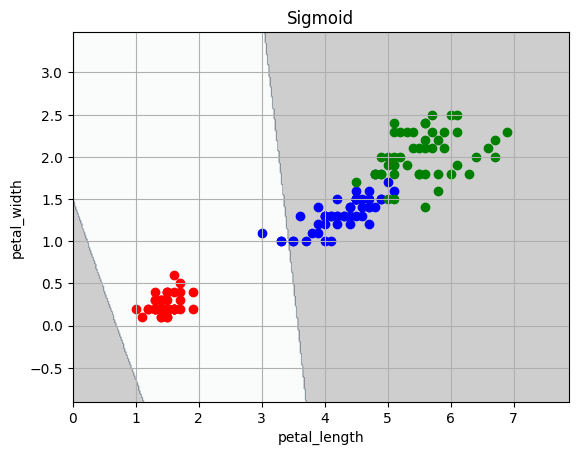

In [4]:
def SVM_plot(clf,title):
  training_x_min=training_data[:,0].min()-1
  training_x_max=training_data[:,0].max()+1
  training_y_min=training_data[:,1].min()-1
  training_y_max=training_data[:,1].max()+1
  grid_interval=0.02   #白色地方可以被無限切割，設0.02表示以0.02做為網格切割線
  xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))
  z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
  z=z.reshape(xx.shape)
  plt.contourf(xx,yy,z,cmap=plt.cm.bone,alpha=0.2)
  plt.autoscale()
  plt.grid()
  plt.scatter(setosa[:,0],setosa[:,1],color='red')    #0第一個特徵,1第二個特徵
  plt.scatter(versicolor[:,0],versicolor[:,1],color='blue')
  plt.scatter(virginica[:,0],virginica[:,1],color='green')
  plt.xlabel('petal_length')
  plt.ylabel('petal_width')
  plt.title(title)
  plt.show()

clf=svm.SVC(kernel='sigmoid')  #換這個
clf.fit(training_data,training_labels)
SVM_plot(clf,'Sigmoid')     #換這個

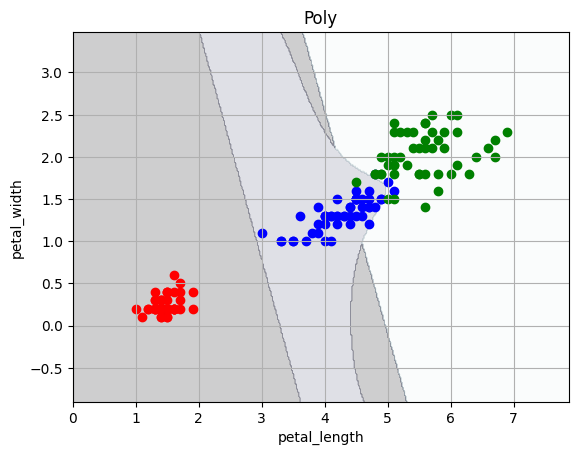

In [5]:
def SVM_plot(clf,title):
  training_x_min=training_data[:,0].min()-1
  training_x_max=training_data[:,0].max()+1
  training_y_min=training_data[:,1].min()-1
  training_y_max=training_data[:,1].max()+1
  grid_interval=0.02   #白色地方可以被無限切割，設0.02表示以0.02做為網格切割線
  xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))
  z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
  z=z.reshape(xx.shape)
  plt.contourf(xx,yy,z,cmap=plt.cm.bone,alpha=0.2)
  plt.autoscale()
  plt.grid()
  plt.scatter(setosa[:,0],setosa[:,1],color='red')    #0第一個特徵,1第二個特徵
  plt.scatter(versicolor[:,0],versicolor[:,1],color='blue')
  plt.scatter(virginica[:,0],virginica[:,1],color='green')
  plt.xlabel('petal_length')
  plt.ylabel('petal_width')
  plt.title(title)
  plt.show()

clf=svm.SVC(kernel='poly',degree=20)  #換這個
clf.fit(training_data,training_labels)
SVM_plot(clf,'Poly')     #換這個

## 實際操作

In [9]:
iris=datasets.load_iris()
X=iris.data
y=iris.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
clf=svm.SVC(kernel='poly',gamma='auto',C=1,degree=10)
clf.fit(X_train,y_train)
clf.predict(X_test)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

1.0
0.9777777777777777
